# 📊 Análise Exploratória dos Dados - Amazônia Legal
## Desafio 2 - Ciência e Governança de Dados

---

### Objetivos:
- Carregar e explorar os dados consolidados da Amazônia Legal
- Analisar distribuições e tendências
- Identificar correlações entre variáveis
- Detectar outliers e valores atípicos
- Visualizar padrões espaciais e temporais

In [1]:
# Importações
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from src.data_processing import DataProcessor
from src.visualization import DataVisualizer

warnings.filterwarnings('ignore')

# Configurações
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


## 1️⃣ Carregamento dos Dados

In [2]:
# Inicializa processador
processor = DataProcessor(base_path='../data')
visualizer = DataVisualizer()

# Carrega dados
df = processor.load_base_final()

print(f"📦 Shape dos dados: {df.shape}")
print(f"📅 Período: {df['ano'].min()} - {df['ano'].max()}")
print(f"🗺️ Estados: {df['UF'].nunique()}")

df.head(10)

📦 Shape dos dados: (90, 7)
📅 Período: 2012 - 2021
🗺️ Estados: 9


,UF,ano,populacao,pib_mil_reais,pib_bilhoes,IDH,desmatamento_km2
0,AC,2012,758786,10137925.00,10.14,0.70,270.60
1,AC,2013,776463,11473929.00,11.47,0.71,200.24
2,AC,2014,790101,13458696.00,13.46,0.71,348.61
3,AC,2015,803513,13622803.00,13.62,0.72,223.00
4,AC,2016,816687,13754242.00,13.75,0.72,366.33
5,AC,2017,829619,14272939.00,14.27,0.71,245.89
6,AC,2018,869265,15331124.00,15.33,0.73,426.72
7,AC,2019,881935,15630018.00,15.63,0.74,706.94
8,AC,2020,894470,16476370.00,16.48,0.75,3259.66
9,AC,2021,906876,21374442.00,21.37,0.71,266.47


## 2️⃣ Informações Gerais do Dataset

In [3]:
# Informações sobre as colunas
print("📋 Informações do Dataset:")
print("="*60)
df.info()

print("\n" + "="*60)
print("\n📊 Estatísticas Descritivas:")
print("="*60)
df.describe().T

📋 Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UF                90 non-null     object 
 1   ano               90 non-null     int64  
 2   populacao         90 non-null     int64  
 3   pib_mil_reais     90 non-null     float64
 4   pib_bilhoes       90 non-null     float64
 5   IDH               90 non-null     float64
 6   desmatamento_km2  90 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 5.1+ KB


📊 Estatísticas Descritivas:


,count,mean,std,min,25%,50%,75%,max
ano,90.00,2016.50,2.89,2012.00,2014.00,2016.50,2019.00,2021.00
populacao,90.00,3121060.73,2691446.68,469524.00,833647.00,1772714.50,4128600.50,8777124.00
pib_mil_reais,90.00,66015529.61,57158351.53,7711468.00,16137298.00,44281889.50,100953199.50,262904981.00
pib_bilhoes,90.00,66.01,57.16,7.71,16.13,44.28,100.95,262.90
IDH,90.00,0.72,0.03,0.65,0.70,0.72,0.74,0.78
desmatamento_km2,90.00,1355.50,2580.66,3.30,161.53,620.09,1450.85,18328.02


In [4]:
# Verificar valores faltantes
missing = processor.check_missing_values(df)

if len(missing) > 0:
    print("⚠️ Valores Faltantes Encontrados:")
    print(missing)
else:
    print("✅ Não há valores faltantes no dataset!")

✅ Não há valores faltantes no dataset!


## 3️⃣ Análise por Estado

In [5]:
# Resumo por estado
print("📊 Resumo por Estado (Média do Período 2012-2021):")
print("="*80)

resumo_uf = df.groupby('UF').agg({
    'populacao': 'mean',
    'pib_bilhoes': 'mean',
    'IDH': 'mean',
    'desmatamento_km2': 'mean'
}).round(2)

resumo_uf = resumo_uf.sort_values('desmatamento_km2', ascending=False)
resumo_uf

📊 Resumo por Estado (Média do Período 2012-2021):


,populacao,pib_bilhoes,IDH,desmatamento_km2
UF,,,,
PA,8323483.50,159.57,0.69,4138.09
MT,3345728.50,131.99,0.76,2590.03
AM,3997918.30,96.66,0.71,1483.22
RO,1757457.90,41.66,0.71,1481.55
MA,6959610.10,88.58,0.68,758.32
TO,1531666.60,33.58,0.74,645.29
AC,832771.50,14.55,0.72,631.45
RR,546328.50,12.17,0.74,376.50
AP,794581.70,15.38,0.72,95.09


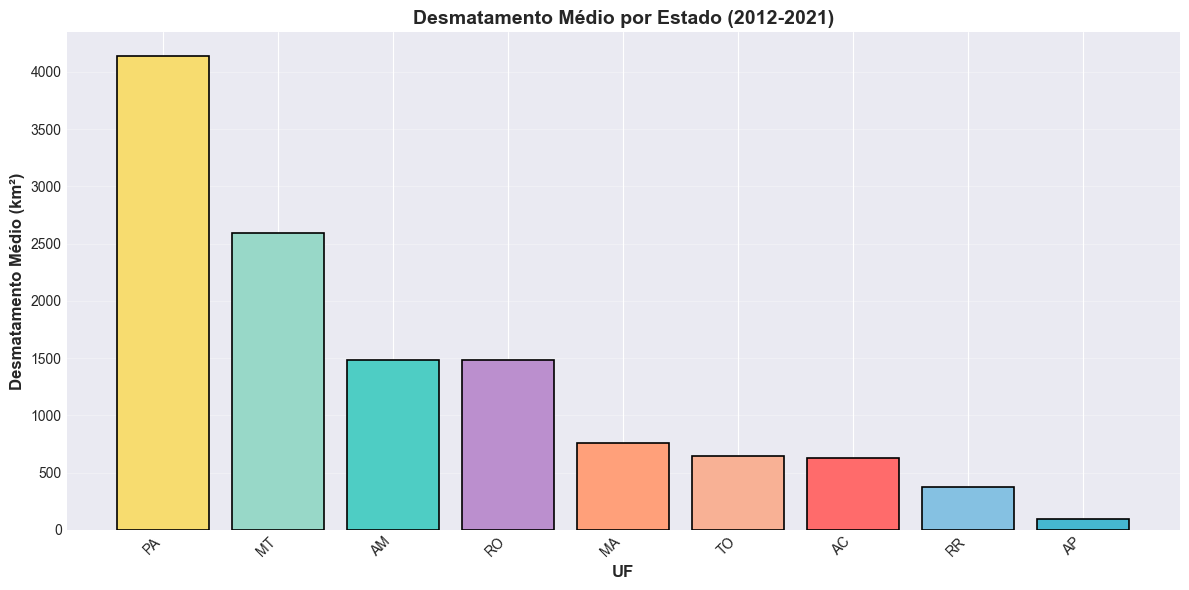

In [6]:
# Visualização: Desmatamento médio por estado
fig = visualizer.plot_bar_comparison(
    df=resumo_uf.reset_index(),
    x='UF',
    y='desmatamento_km2',
    title='Desmatamento Médio por Estado (2012-2021)',
    figsize=(12, 6)
)
plt.ylabel('Desmatamento Médio (km²)', fontweight='bold')
plt.show()

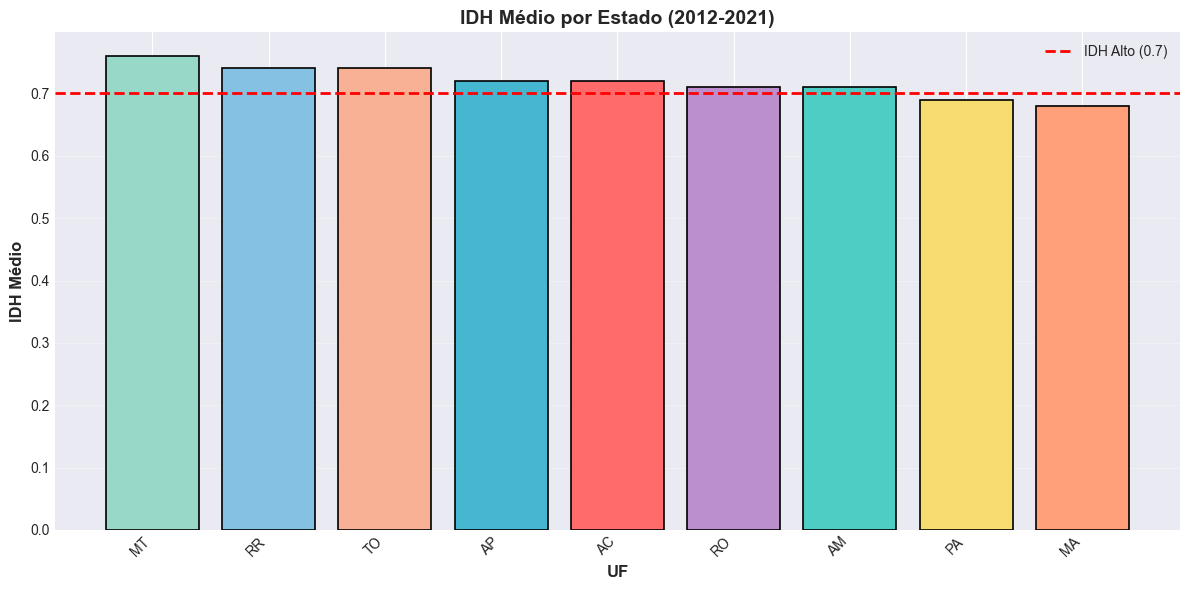

In [7]:
# Visualização: IDH médio por estado
fig = visualizer.plot_bar_comparison(
    df=resumo_uf.reset_index().sort_values('IDH', ascending=False),
    x='UF',
    y='IDH',
    title='IDH Médio por Estado (2012-2021)',
    figsize=(12, 6)
)
plt.ylabel('IDH Médio', fontweight='bold')
plt.axhline(y=0.7, color='red', linestyle='--', linewidth=2, label='IDH Alto (0.7)')
plt.legend()
plt.show()

## 4️⃣ Análise Temporal

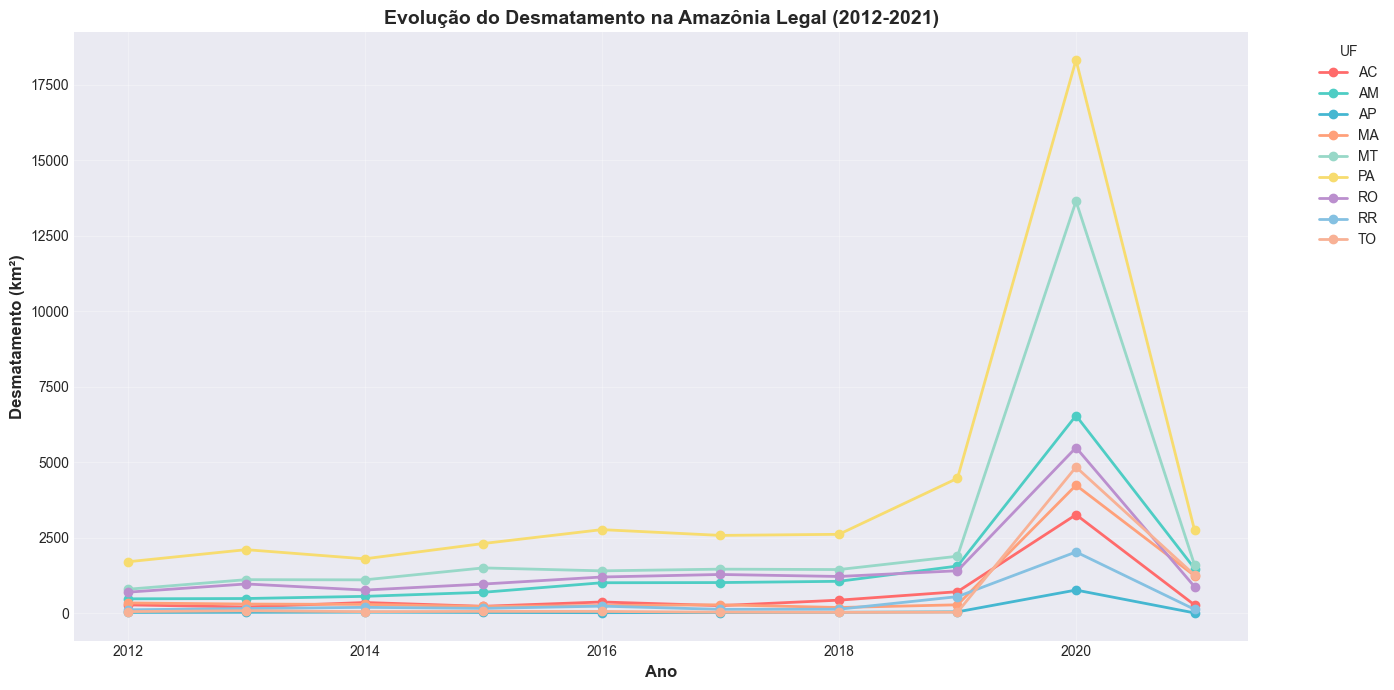

In [8]:
# Evolução do desmatamento ao longo do tempo
fig = visualizer.plot_time_series(
    df=df,
    x='ano',
    y='desmatamento_km2',
    hue='UF',
    title='Evolução do Desmatamento na Amazônia Legal (2012-2021)',
    ylabel='Desmatamento (km²)',
    figsize=(14, 7)
)
plt.show()

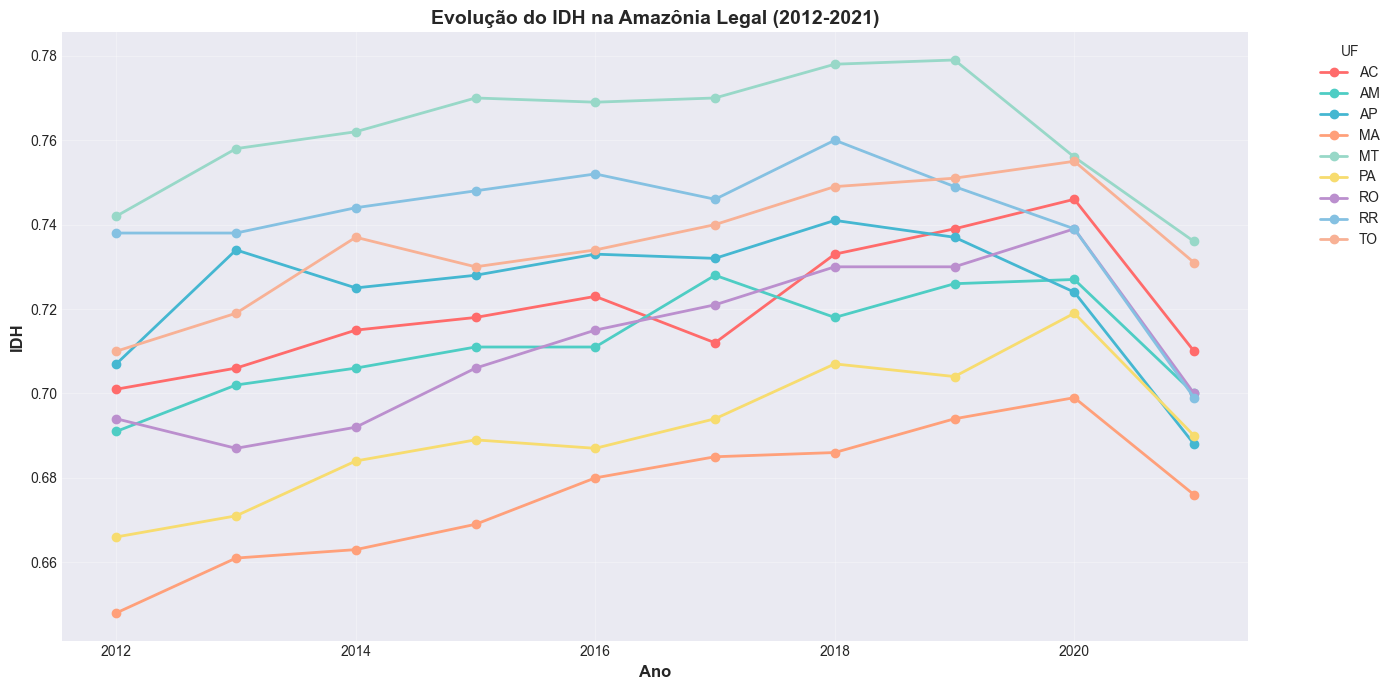

In [9]:
# Evolução do IDH ao longo do tempo
fig = visualizer.plot_time_series(
    df=df,
    x='ano',
    y='IDH',
    hue='UF',
    title='Evolução do IDH na Amazônia Legal (2012-2021)',
    ylabel='IDH',
    figsize=(14, 7)
)
plt.show()

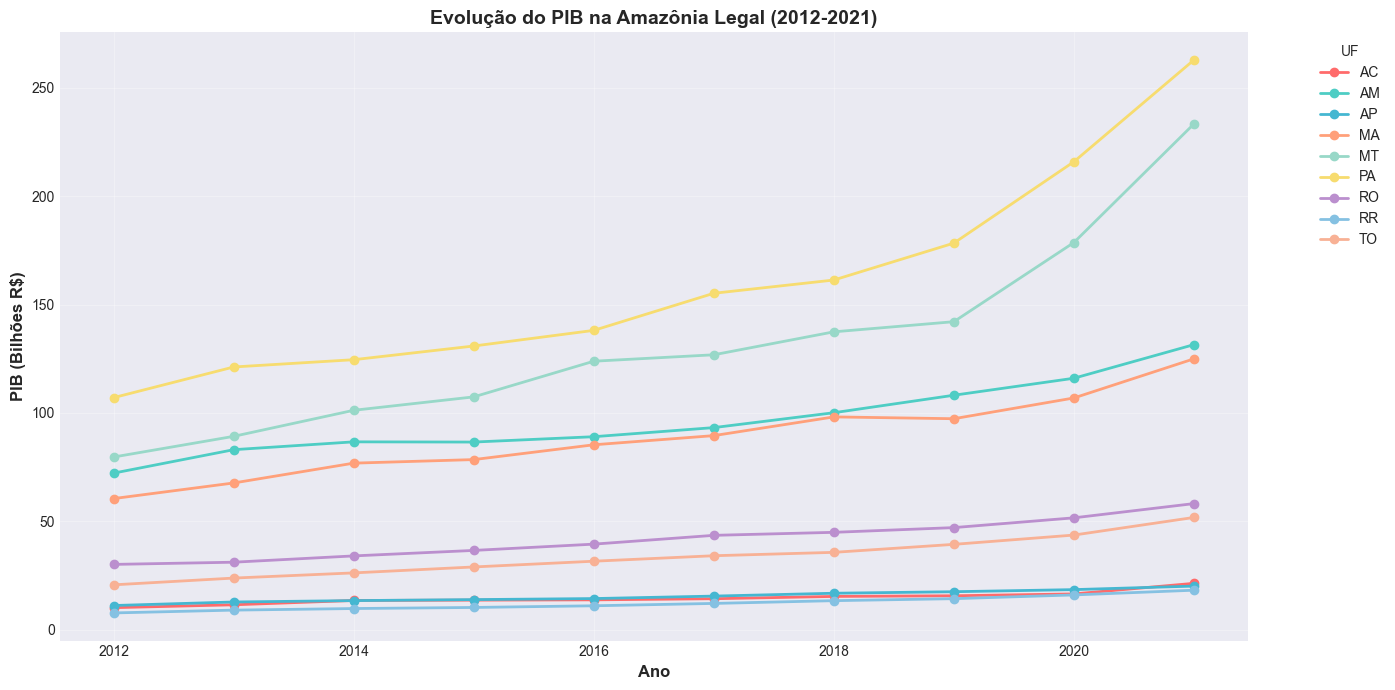

In [10]:
# Evolução do PIB ao longo do tempo
fig = visualizer.plot_time_series(
    df=df,
    x='ano',
    y='pib_bilhoes',
    hue='UF',
    title='Evolução do PIB na Amazônia Legal (2012-2021)',
    ylabel='PIB (Bilhões R$)',
    figsize=(14, 7)
)
plt.show()

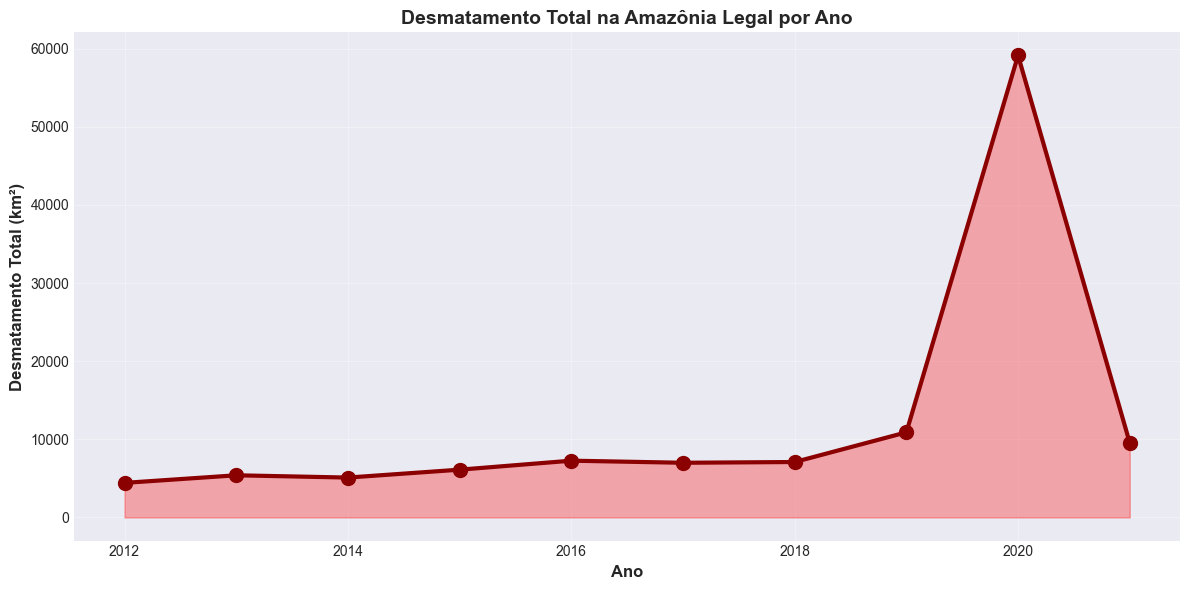


🚨 Ano com MAIOR desmatamento: 2020
   Total: 59120.25 km²

✅ Ano com MENOR desmatamento: 2012
   Total: 4427.38 km²


In [11]:
# Tendência geral de desmatamento
desmatamento_anual = df.groupby('ano')['desmatamento_km2'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(desmatamento_anual['ano'], desmatamento_anual['desmatamento_km2'], 
         marker='o', linewidth=3, markersize=10, color='darkred')
plt.fill_between(desmatamento_anual['ano'], desmatamento_anual['desmatamento_km2'], 
                 alpha=0.3, color='red')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Desmatamento Total (km²)', fontsize=12, fontweight='bold')
plt.title('Desmatamento Total na Amazônia Legal por Ano', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Destaque para 2020 (pico)
print(f"\n🚨 Ano com MAIOR desmatamento: {desmatamento_anual.loc[desmatamento_anual['desmatamento_km2'].idxmax(), 'ano']:.0f}")
print(f"   Total: {desmatamento_anual['desmatamento_km2'].max():.2f} km²")
print(f"\n✅ Ano com MENOR desmatamento: {desmatamento_anual.loc[desmatamento_anual['desmatamento_km2'].idxmin(), 'ano']:.0f}")
print(f"   Total: {desmatamento_anual['desmatamento_km2'].min():.2f} km²")

## 5️⃣ Análise de Distribuições

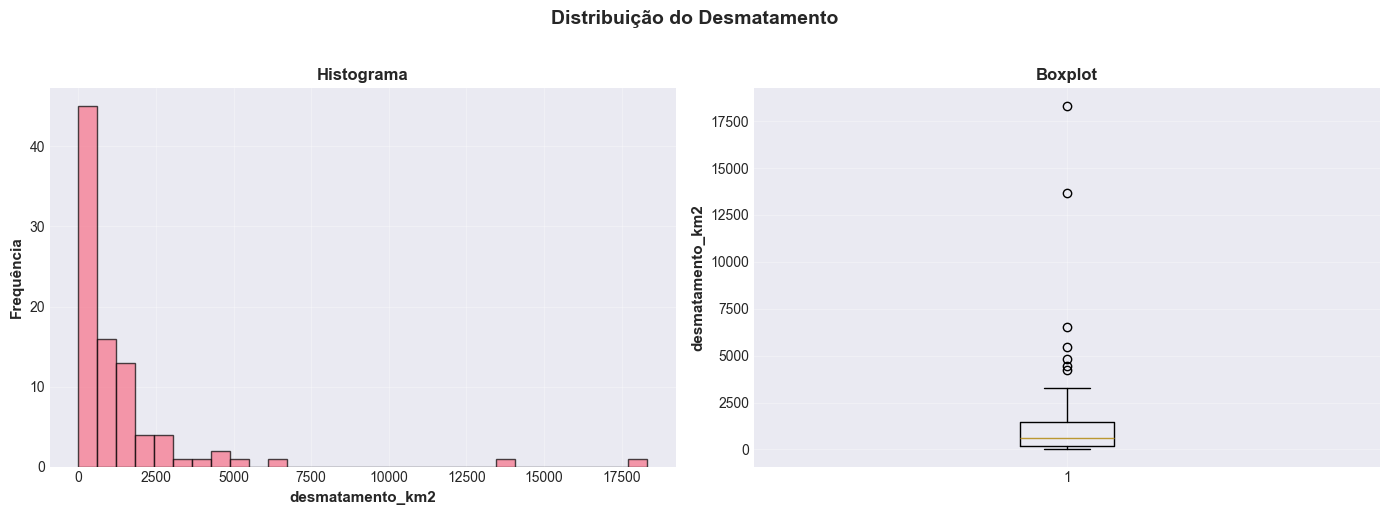

In [12]:
# Distribuição do desmatamento
fig = visualizer.plot_distribution(
    df=df,
    column='desmatamento_km2',
    bins=30,
    title='Distribuição do Desmatamento',
    figsize=(14, 5)
)
plt.show()

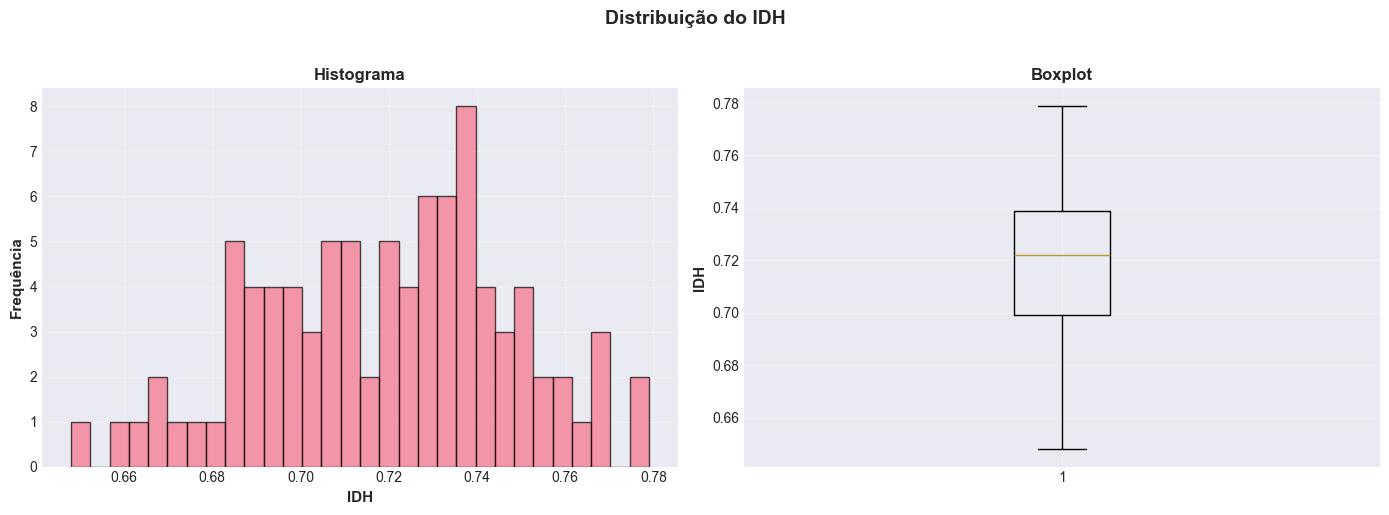

In [13]:
# Distribuição do IDH
fig = visualizer.plot_distribution(
    df=df,
    column='IDH',
    bins=30,
    title='Distribuição do IDH',
    figsize=(14, 5)
)
plt.show()

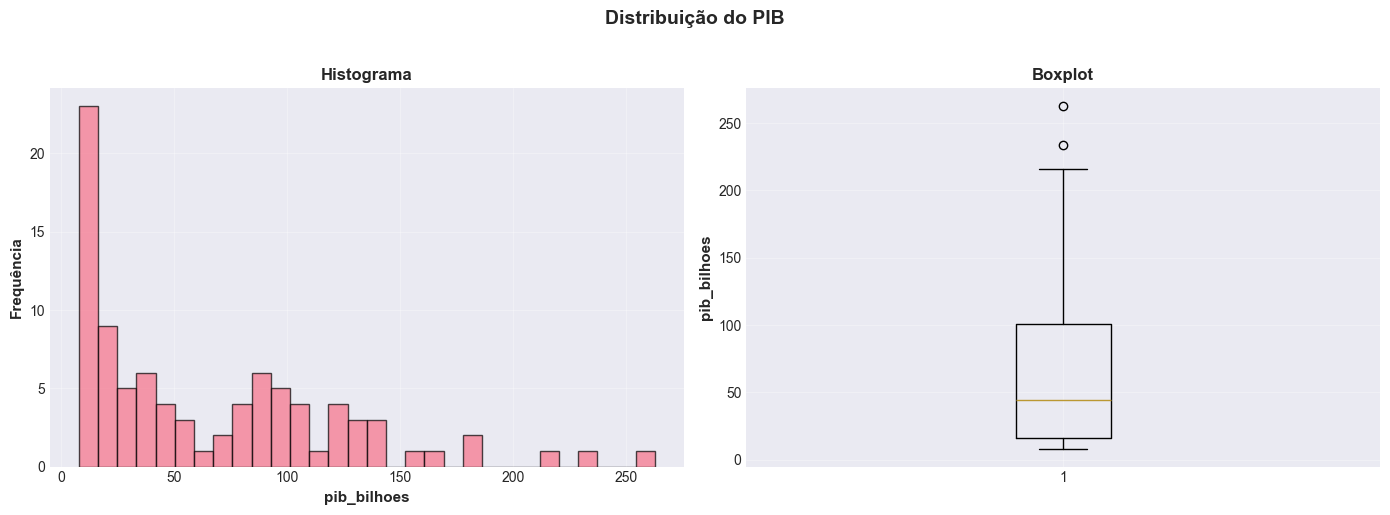

In [14]:
# Distribuição do PIB
fig = visualizer.plot_distribution(
    df=df,
    column='pib_bilhoes',
    bins=30,
    title='Distribuição do PIB',
    figsize=(14, 5)
)
plt.show()

## 6️⃣ Análise de Correlações

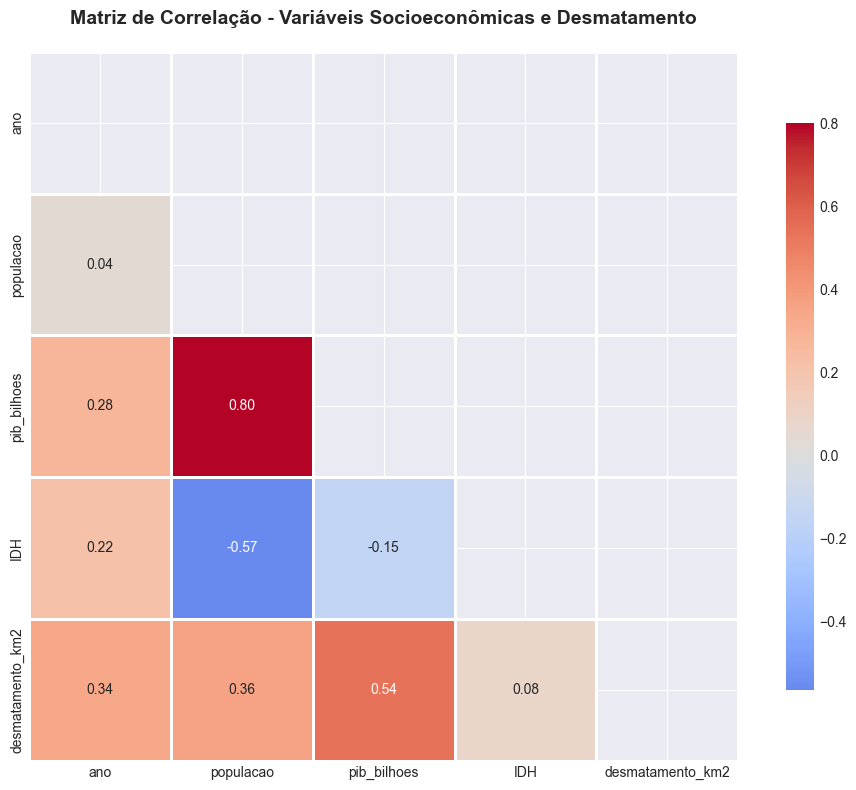

In [15]:
# Matriz de correlação
colunas_numericas = ['ano', 'populacao', 'pib_bilhoes', 'IDH', 'desmatamento_km2']

fig = visualizer.plot_correlation_matrix(
    df=df,
    columns=colunas_numericas,
    title='Matriz de Correlação - Variáveis Socioeconômicas e Desmatamento',
    figsize=(10, 8)
)
plt.show()

In [16]:
# Análise de correlação específica
correlacoes = df[colunas_numericas].corr()['desmatamento_km2'].sort_values(ascending=False)

print("🔍 Correlações com Desmatamento:")
print("="*50)
for var, corr in correlacoes.items():
    if var != 'desmatamento_km2':
        print(f"{var:20s}: {corr:+.3f}")

🔍 Correlações com Desmatamento:
pib_bilhoes         : +0.544
populacao           : +0.356
ano                 : +0.342
IDH                 : +0.082


## 7️⃣ Relações entre Variáveis

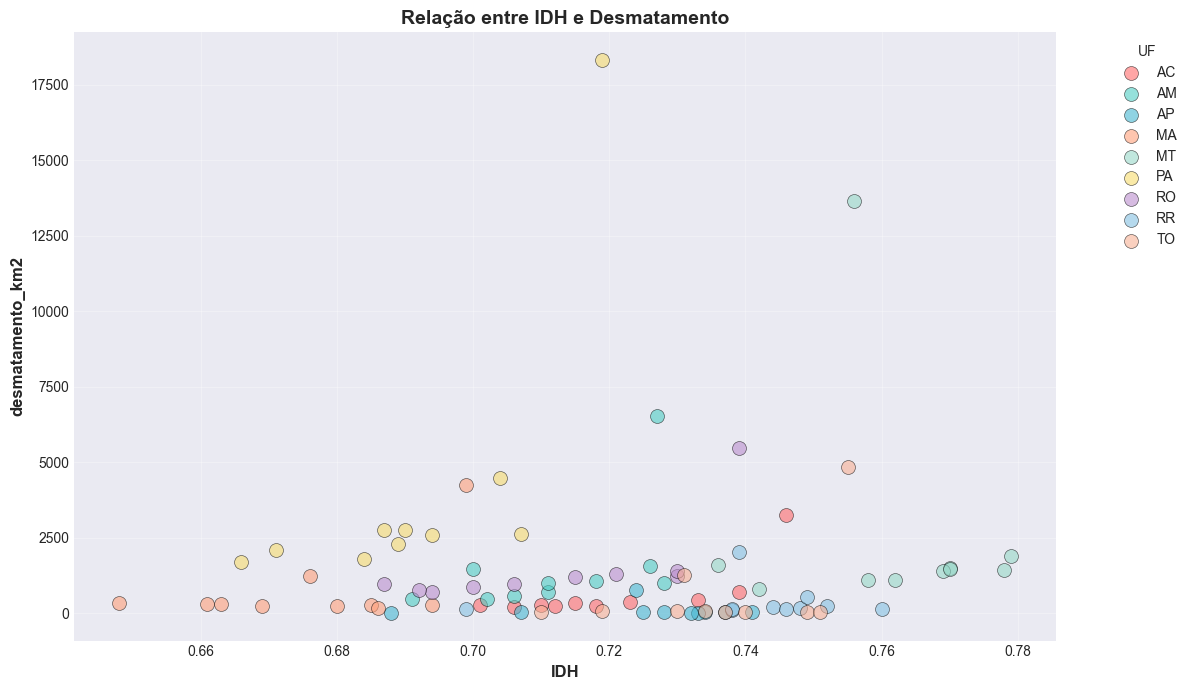

In [17]:
# Desmatamento vs IDH
fig = visualizer.plot_scatter(
    df=df,
    x='IDH',
    y='desmatamento_km2',
    hue='UF',
    title='Relação entre IDH e Desmatamento',
    figsize=(12, 7)
)
plt.show()

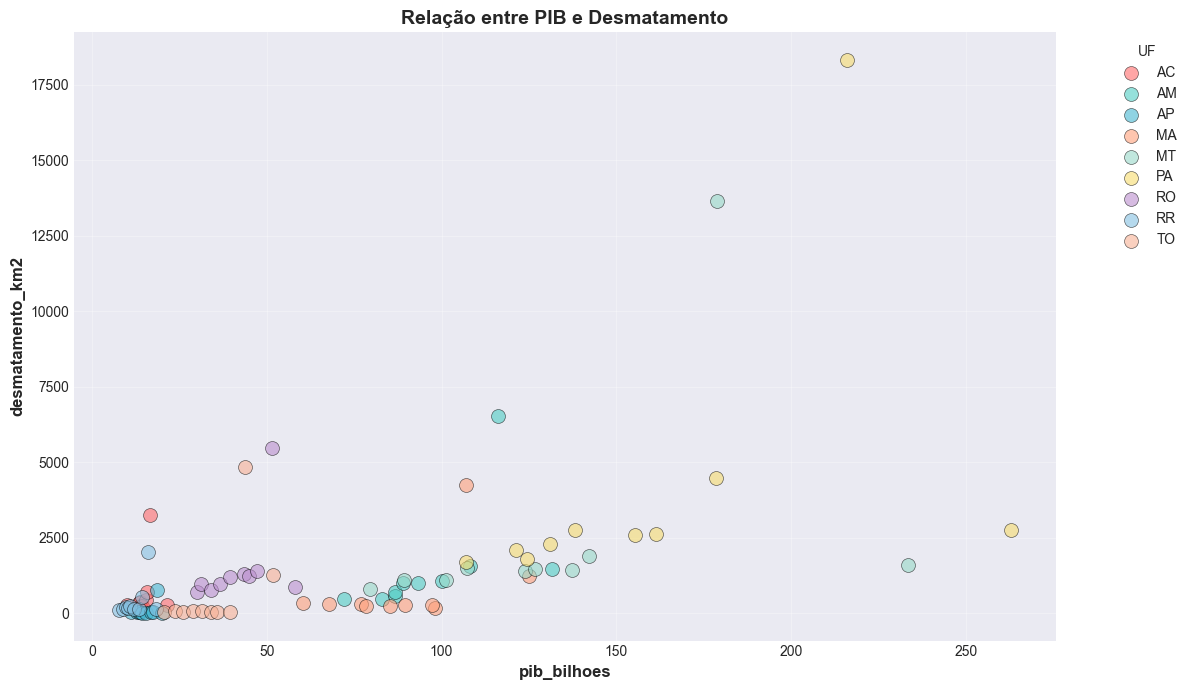

In [18]:
# Desmatamento vs PIB
fig = visualizer.plot_scatter(
    df=df,
    x='pib_bilhoes',
    y='desmatamento_km2',
    hue='UF',
    title='Relação entre PIB e Desmatamento',
    figsize=(12, 7)
)
plt.show()

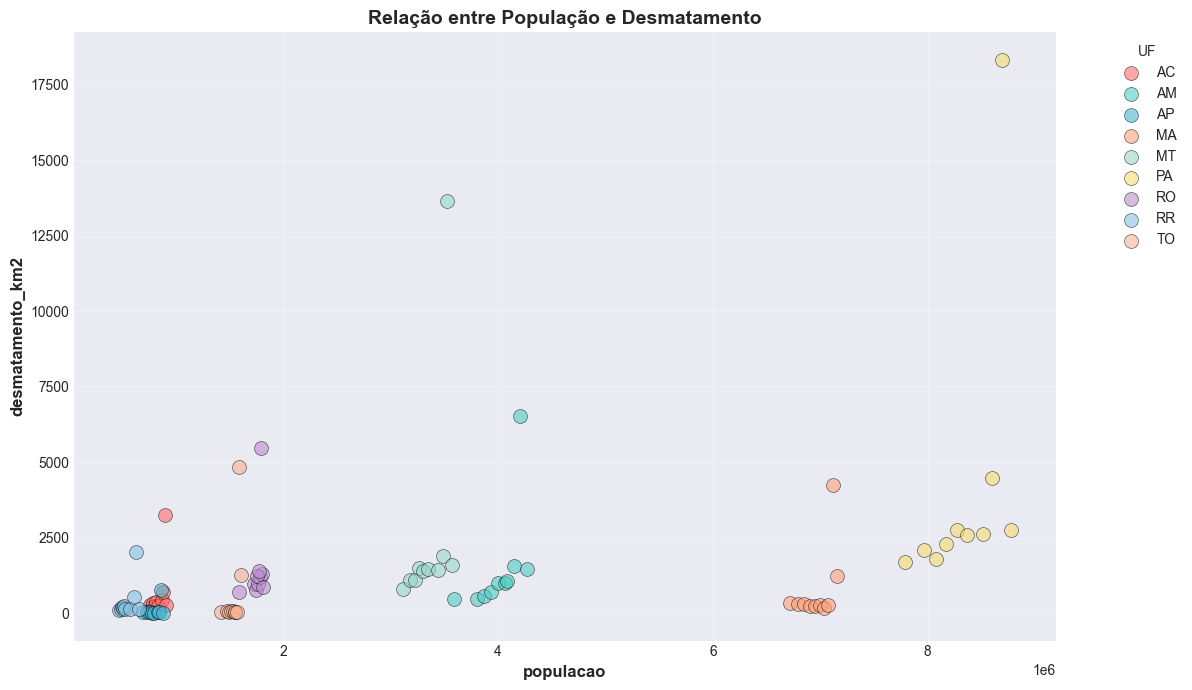

In [19]:
# Desmatamento vs População
fig = visualizer.plot_scatter(
    df=df,
    x='populacao',
    y='desmatamento_km2',
    hue='UF',
    title='Relação entre População e Desmatamento',
    figsize=(12, 7)
)
plt.show()

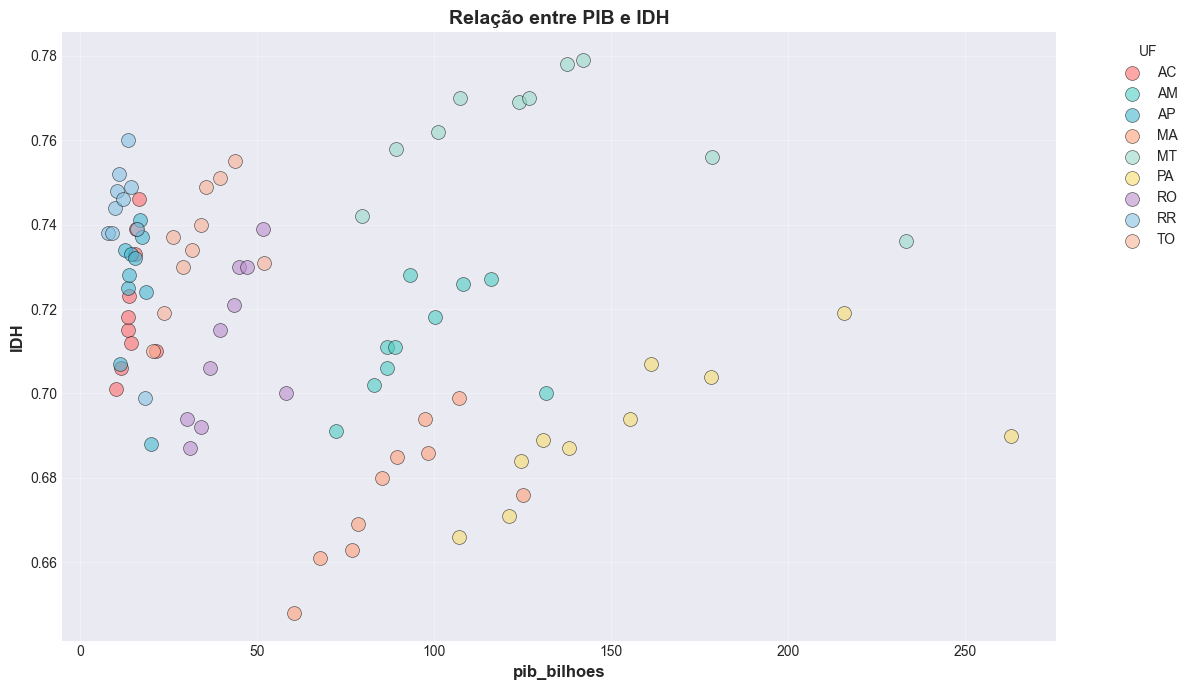

In [20]:
# IDH vs PIB
fig = visualizer.plot_scatter(
    df=df,
    x='pib_bilhoes',
    y='IDH',
    hue='UF',
    title='Relação entre PIB e IDH',
    figsize=(12, 7)
)
plt.show()

## 8️⃣ Detecção de Outliers

In [21]:
# Identificar outliers no desmatamento
Q1 = df['desmatamento_km2'].quantile(0.25)
Q3 = df['desmatamento_km2'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['desmatamento_km2'] < lower_bound) | (df['desmatamento_km2'] > upper_bound)]

print(f"🔍 Outliers detectados: {len(outliers)} registros")
print(f"   Limite inferior: {lower_bound:.2f} km²")
print(f"   Limite superior: {upper_bound:.2f} km²")
print("\n📊 Top 10 Outliers (Maior Desmatamento):")
print("="*70)
outliers.nlargest(10, 'desmatamento_km2')[['UF', 'ano', 'desmatamento_km2', 'IDH', 'pib_bilhoes']]

🔍 Outliers detectados: 7 registros
   Limite inferior: -1772.45 km²
   Limite superior: 3384.84 km²

📊 Top 10 Outliers (Maior Desmatamento):


,UF,ano,desmatamento_km2,IDH,pib_bilhoes
58,PA,2020,18328.02,0.72,215.94
48,MT,2020,13646.99,0.76,178.65
18,AM,2020,6543.27,0.73,116.02
68,RO,2020,5482.90,0.74,51.60
88,TO,2020,4838.01,0.76,43.65
57,PA,2019,4465.60,0.70,178.38
38,MA,2020,4235.28,0.70,106.92


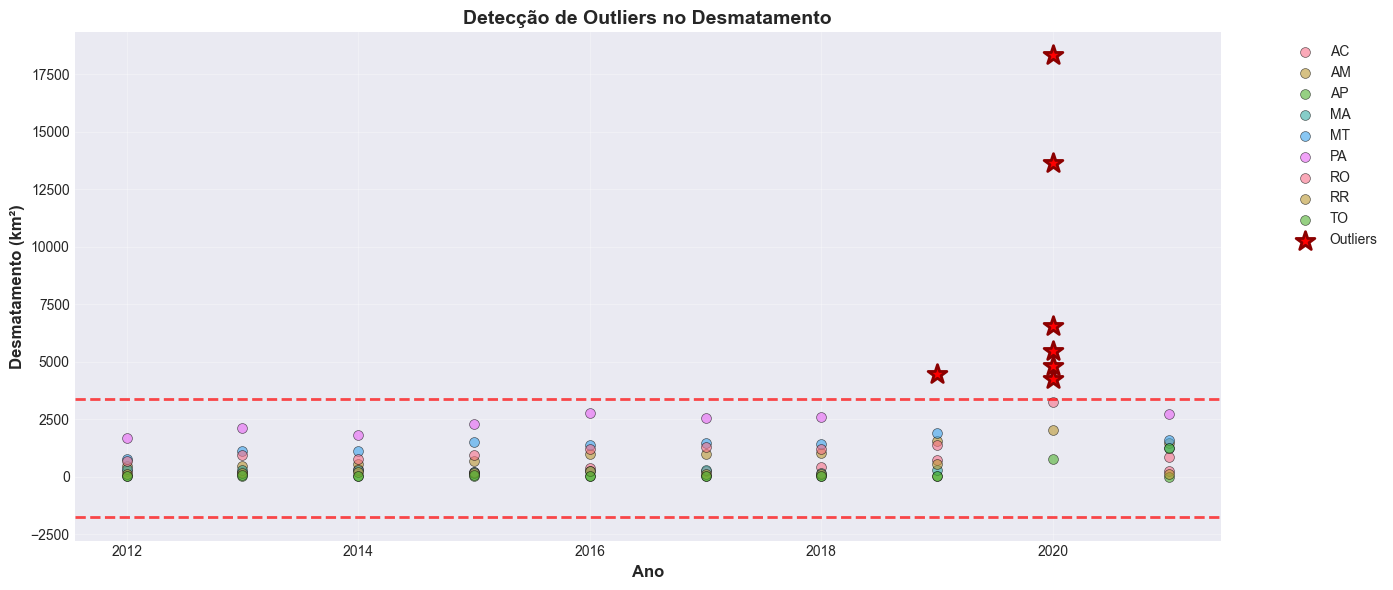

In [22]:
# Visualização dos outliers
fig, ax = plt.subplots(figsize=(14, 6))

# Plot normal
for uf in df['UF'].unique():
    df_uf = df[df['UF'] == uf]
    ax.scatter(df_uf['ano'], df_uf['desmatamento_km2'], 
              label=uf, s=50, alpha=0.6, edgecolors='black', linewidth=0.5)

# Destaca outliers
ax.scatter(outliers['ano'], outliers['desmatamento_km2'], 
          s=200, color='red', marker='*', 
          edgecolors='darkred', linewidth=2, 
          label='Outliers', zorder=5)

# Linhas de limite
ax.axhline(y=upper_bound, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax.axhline(y=lower_bound, color='red', linestyle='--', linewidth=2, alpha=0.7)

ax.set_xlabel('Ano', fontsize=12, fontweight='bold')
ax.set_ylabel('Desmatamento (km²)', fontsize=12, fontweight='bold')
ax.set_title('Detecção de Outliers no Desmatamento', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9️⃣ Insights e Conclusões

In [23]:
print("="*80)
print("🎯 PRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA")
print("="*80)

# 1. Estado com maior desmatamento médio
uf_maior_desmat = resumo_uf.idxmax()['desmatamento_km2']
print(f"\n1️⃣ Estado com MAIOR desmatamento médio: {uf_maior_desmat}")
print(f"   Média: {resumo_uf.loc[uf_maior_desmat, 'desmatamento_km2']:.2f} km²/ano")

# 2. Estado com menor desmatamento médio
uf_menor_desmat = resumo_uf.idxmin()['desmatamento_km2']
print(f"\n2️⃣ Estado com MENOR desmatamento médio: {uf_menor_desmat}")
print(f"   Média: {resumo_uf.loc[uf_menor_desmat, 'desmatamento_km2']:.2f} km²/ano")

# 3. Estado com maior IDH médio
uf_maior_idh = resumo_uf.idxmax()['IDH']
print(f"\n3️⃣ Estado com MAIOR IDH médio: {uf_maior_idh}")
print(f"   IDH: {resumo_uf.loc[uf_maior_idh, 'IDH']:.3f}")

# 4. Correlação IDH vs Desmatamento
corr_idh_desmat = df['IDH'].corr(df['desmatamento_km2'])
print(f"\n4️⃣ Correlação IDH x Desmatamento: {corr_idh_desmat:+.3f}")
if abs(corr_idh_desmat) < 0.3:
    print("   Interpretação: Correlação FRACA")
elif abs(corr_idh_desmat) < 0.7:
    print("   Interpretação: Correlação MODERADA")
else:
    print("   Interpretação: Correlação FORTE")

# 5. Tendência temporal
desmat_2012 = df[df['ano'] == 2012]['desmatamento_km2'].sum()
desmat_2021 = df[df['ano'] == 2021]['desmatamento_km2'].sum()
variacao_pct = ((desmat_2021 - desmat_2012) / desmat_2012) * 100

print(f"\n5️⃣ Variação 2012-2021: {variacao_pct:+.1f}%")
print(f"   2012: {desmat_2012:.2f} km²")
print(f"   2021: {desmat_2021:.2f} km²")

# 6. Outliers
print(f"\n6️⃣ Outliers detectados: {len(outliers)} casos ({len(outliers)/len(df)*100:.1f}% dos dados)")
print(f"   Principal ano de outliers: {outliers['ano'].mode().values[0]:.0f}")

print("\n" + "="*80)

🎯 PRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA

1️⃣ Estado com MAIOR desmatamento médio: PA
   Média: 4138.09 km²/ano

2️⃣ Estado com MENOR desmatamento médio: AP
   Média: 95.09 km²/ano

3️⃣ Estado com MAIOR IDH médio: MT
   IDH: 0.760

4️⃣ Correlação IDH x Desmatamento: +0.082
   Interpretação: Correlação FRACA

5️⃣ Variação 2012-2021: +116.0%
   2012: 4427.38 km²
   2021: 9563.80 km²

6️⃣ Outliers detectados: 7 casos (7.8% dos dados)
   Principal ano de outliers: 2020



## 🎯 Próximos Passos

1. **Feature Engineering**: Criar novas variáveis derivadas
2. **Modelagem**: Desenvolver modelos preditivos
3. **Dashboard**: Criar visualizações interativas